# Cross-validation CNB algorithm

Parametri globali

In [50]:
alpha=0.2
nfold=10

Importazione del dataset:

In [51]:
import pandas as pd

df = pd.read_excel('./politica.xlsx', sheet_name="Foglio1")
print(f'Found {len(df)} texts.')

print(f'{df["cap_maj_master"].isnull().sum()} document(s) with no classification removed')
df=df[pd.notnull(df['cap_maj_master'])]

print(f'{df["testo"].isnull().sum()} document(s) with no text removed')
df=df[pd.notnull(df['testo'])]

classes = [int(c) for c in df['cap_maj_master']]
documents = [d for d in df['testo']]
df = df[['cap_maj_master', 'testo']]
df.columns = ['sentiment', 'review']
df.head(3)

Found 5674 texts.
2 document(s) with no classification removed
424 document(s) with no text removed


,sentiment,review
0,1.0,: quali siano le determinazioni del Governo in...
1,1.0,: quali siano le valutazioni del Governo sugli...
2,1.0,- premesso che: la prospettata modifica degli ...


Impostazioni parametri di preprocessing

In [52]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', ' ', str(text))
    text=re.sub('\d+',' ',str(text))
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           str(text))
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' +
            ' '.join(emoticons).replace('-', ''))
    return text


In [53]:
prova="ciao 2398,cangnolino :-) sono un tuo 40cm 40 cm"
print(preprocessor(prova))

ciao cangnolino sono un tuo cm cm :)


In [54]:
import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return text

In [55]:
df['review'] = df['review'].apply(preprocessor).apply(strip_accents)

In [56]:
df.head(3)

,sentiment,review
0,1.0,quali siano le determinazioni del governo in ...
1,1.0,quali siano le valutazioni del governo sugli ...
2,1.0,premesso che la prospettata modifica degli sc...


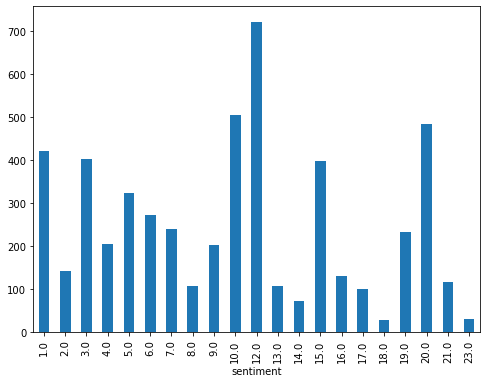

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('sentiment').review.count().plot.bar(ylim=0)
plt.show()

Creazione delle features come array

In [58]:


X, y = df.iloc[:,1].values, df.iloc[:,0].values


Creazione della pipeline

In [59]:
from nltk.corpus import stopwords
stop=stopwords.words('italian')


In [60]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

porter = PorterStemmer()
stemmer = SnowballStemmer("italian", ignore_stopwords=True)

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [stemmer.stem(word) for word in text.split()]


In [61]:
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        stop_words=stop,                        
                       )

pipe_lr = make_pipeline(tfidf,ComplementNB
                        (alpha=alpha))


Implementazione algoritmo di classificazione e cross-validation


--------------- Fold:  1 ---------------------

              precision    recall  f1-score   support

         1.0       0.53      0.79      0.63        42
         2.0       0.86      0.40      0.55        15
         3.0       0.82      0.90      0.86        40
         4.0       0.78      0.86      0.82        21
         5.0       0.70      0.50      0.58        32
         6.0       0.87      1.00      0.93        27
         7.0       0.56      0.62      0.59        24
         8.0       0.78      0.64      0.70        11
         9.0       0.68      0.75      0.71        20
        10.0       0.71      0.88      0.79        50
        12.0       0.60      0.88      0.71        73
        13.0       1.00      0.36      0.53        11
        14.0       0.50      0.29      0.36         7
        15.0       0.70      0.40      0.51        40
        16.0       0.60      0.46      0.52        13
        17.0       0.62      0.50      0.56        10
        18.0       0.00      0.00

c:\users\berto\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


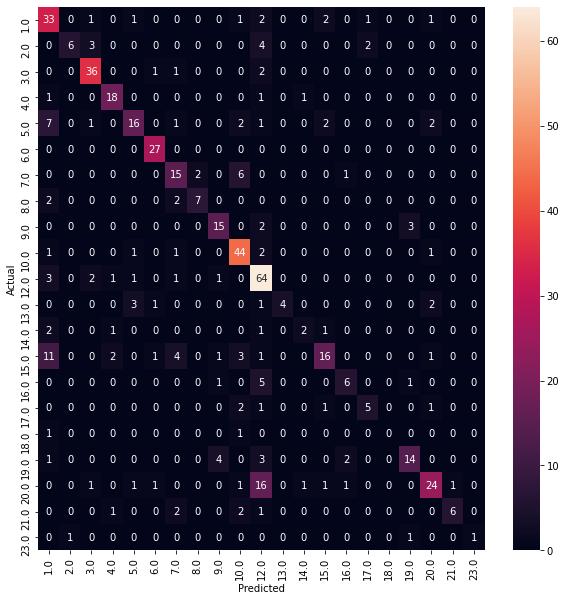


--------------- Fold:  2 ---------------------

              precision    recall  f1-score   support

         1.0       0.58      0.74      0.65        42
         2.0       0.71      0.33      0.45        15
         3.0       0.82      0.82      0.82        40
         4.0       0.78      0.86      0.82        21
         5.0       0.61      0.53      0.57        32
         6.0       0.85      0.85      0.85        27
         7.0       0.53      0.83      0.65        24
         8.0       0.91      0.91      0.91        11
         9.0       0.57      0.60      0.59        20
        10.0       0.70      0.88      0.78        50
        12.0       0.60      0.88      0.71        72
        13.0       1.00      0.09      0.17        11
        14.0       0.60      0.43      0.50         7
        15.0       0.46      0.33      0.38        40
        16.0       0.58      0.54      0.56        13
        17.0       0.33      0.20      0.25        10
        18.0       0.00      0.0

c:\users\berto\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


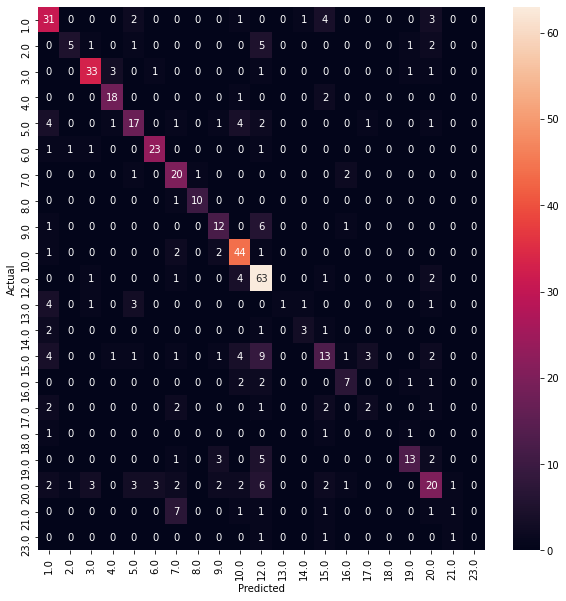


--------------- Fold:  3 ---------------------

              precision    recall  f1-score   support

         1.0       0.51      0.60      0.55        42
         2.0       0.60      0.40      0.48        15
         3.0       0.82      0.90      0.86        40
         4.0       0.77      0.85      0.81        20
         5.0       0.72      0.55      0.62        33
         6.0       0.84      0.96      0.90        28
         7.0       0.74      0.96      0.84        24
         8.0       0.62      0.91      0.74        11
         9.0       0.77      0.85      0.81        20
        10.0       0.78      0.94      0.85        50
        12.0       0.68      0.90      0.78        72
        13.0       1.00      0.27      0.43        11
        14.0       0.71      0.71      0.71         7
        15.0       0.46      0.33      0.38        40
        16.0       0.75      0.46      0.57        13
        17.0       0.67      0.60      0.63        10
        18.0       1.00      0.3

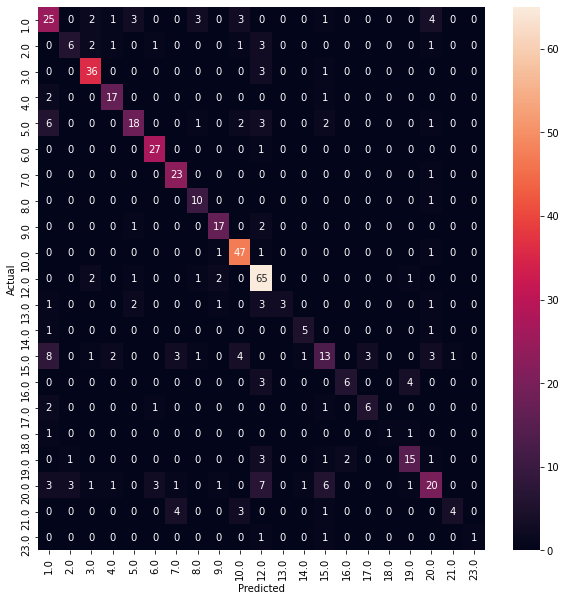


--------------- Fold:  4 ---------------------

              precision    recall  f1-score   support

         1.0       0.63      0.74      0.68        42
         2.0       0.33      0.14      0.20        14
         3.0       0.76      0.88      0.81        40
         4.0       0.84      0.80      0.82        20
         5.0       0.66      0.58      0.61        33
         6.0       0.67      1.00      0.80        28
         7.0       0.69      0.75      0.72        24
         8.0       0.64      0.64      0.64        11
         9.0       0.82      0.70      0.76        20
        10.0       0.75      0.92      0.83        50
        12.0       0.59      0.88      0.71        72
        13.0       0.75      0.27      0.40        11
        14.0       1.00      0.86      0.92         7
        15.0       0.74      0.50      0.60        40
        16.0       0.62      0.62      0.62        13
        17.0       0.80      0.40      0.53        10
        18.0       0.50      0.3

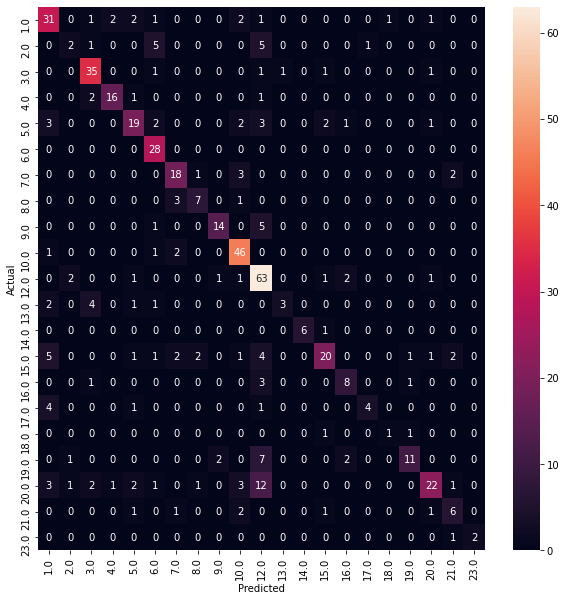


--------------- Fold:  5 ---------------------

              precision    recall  f1-score   support

         1.0       0.57      0.57      0.57        42
         2.0       0.33      0.14      0.20        14
         3.0       0.69      0.78      0.73        40
         4.0       0.77      0.85      0.81        20
         5.0       0.74      0.79      0.76        33
         6.0       0.68      0.93      0.79        28
         7.0       0.69      0.96      0.80        23
         8.0       0.90      0.82      0.86        11
         9.0       0.74      0.70      0.72        20
        10.0       0.73      0.90      0.80        50
        12.0       0.64      0.85      0.73        72
        13.0       1.00      0.27      0.43        11
        14.0       0.75      0.86      0.80         7
        15.0       0.61      0.42      0.50        40
        16.0       0.67      0.57      0.62        14
        17.0       0.67      0.40      0.50        10
        18.0       0.33      0.3

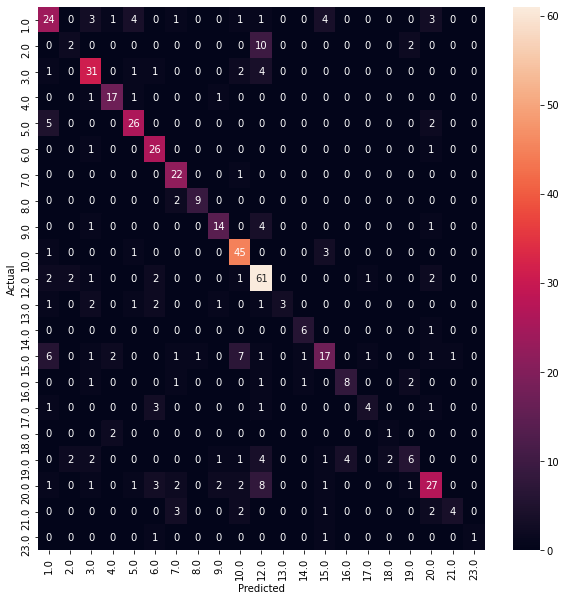


--------------- Fold:  6 ---------------------

              precision    recall  f1-score   support

         1.0       0.49      0.62      0.55        42
         2.0       0.50      0.36      0.42        14
         3.0       0.85      1.00      0.92        40
         4.0       0.68      0.95      0.79        20
         5.0       0.62      0.48      0.54        33
         6.0       0.76      0.93      0.83        27
         7.0       0.73      0.79      0.76        24
         8.0       0.75      0.82      0.78        11
         9.0       0.60      0.90      0.72        20
        10.0       0.71      0.92      0.80        51
        12.0       0.71      0.83      0.77        72
        13.0       0.38      0.27      0.32        11
        14.0       1.00      0.29      0.44         7
        15.0       0.55      0.30      0.39        40
        16.0       0.83      0.71      0.77        14
        17.0       0.89      0.80      0.84        10
        18.0       0.00      0.0

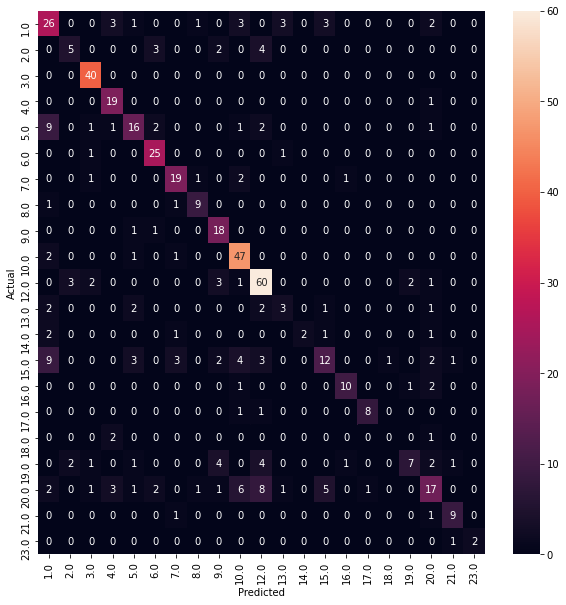


--------------- Fold:  7 ---------------------

              precision    recall  f1-score   support

         1.0       0.54      0.60      0.57        42
         2.0       0.50      0.29      0.36        14
         3.0       0.81      0.83      0.82        41
         4.0       0.73      0.80      0.76        20
         5.0       0.51      0.59      0.55        32
         6.0       0.77      0.89      0.83        27
         7.0       0.78      0.75      0.77        24
         8.0       0.62      0.73      0.67        11
         9.0       0.75      0.86      0.80        21
        10.0       0.81      0.92      0.86        51
        12.0       0.74      0.93      0.83        72
        13.0       0.67      0.18      0.29        11
        14.0       0.62      0.71      0.67         7
        15.0       0.69      0.62      0.65        39
        16.0       0.89      0.62      0.73        13
        17.0       0.78      0.64      0.70        11
        18.0       0.00      0.0

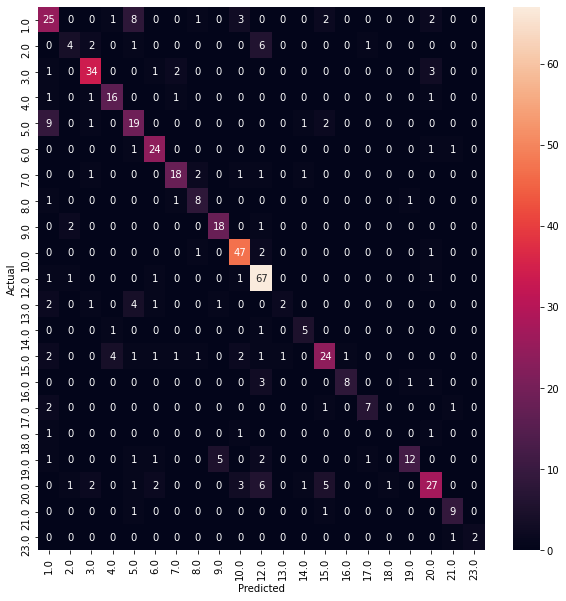


--------------- Fold:  8 ---------------------

              precision    recall  f1-score   support

         1.0       0.46      0.67      0.54        42
         2.0       0.67      0.14      0.24        14
         3.0       0.87      0.95      0.91        41
         4.0       0.90      0.90      0.90        21
         5.0       0.66      0.72      0.69        32
         6.0       0.75      1.00      0.86        27
         7.0       0.73      0.79      0.76        24
         8.0       0.78      0.70      0.74        10
         9.0       0.72      0.86      0.78        21
        10.0       0.78      0.88      0.83        51
        12.0       0.84      0.82      0.83        72
        13.0       0.60      0.30      0.40        10
        14.0       0.83      0.62      0.71         8
        15.0       0.74      0.62      0.68        40
        16.0       0.89      0.62      0.73        13
        17.0       0.56      0.90      0.69        10
        18.0       1.00      0.3

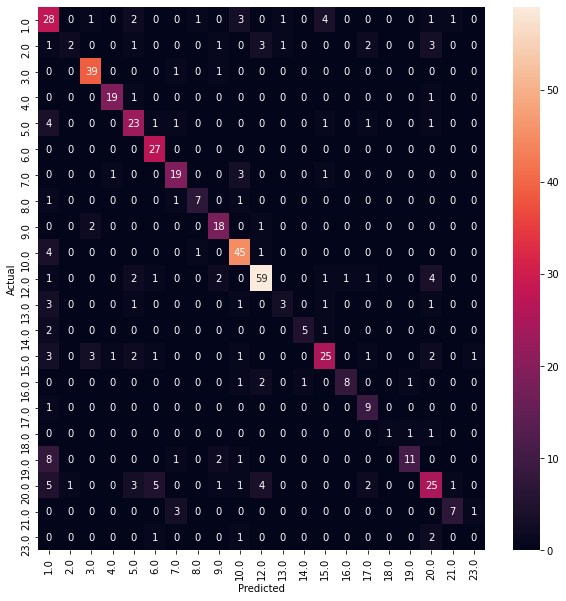


--------------- Fold:  9 ---------------------

              precision    recall  f1-score   support

         1.0       0.57      0.60      0.58        42
         2.0       1.00      0.36      0.53        14
         3.0       0.84      0.78      0.81        41
         4.0       0.80      0.95      0.87        21
         5.0       0.71      0.78      0.75        32
         6.0       0.52      0.96      0.68        27
         7.0       0.65      0.92      0.76        24
         8.0       0.73      0.80      0.76        10
         9.0       0.82      0.67      0.74        21
        10.0       0.80      0.94      0.86        51
        12.0       0.69      0.82      0.75        72
        13.0       1.00      0.10      0.18        10
        14.0       1.00      0.75      0.86         8
        15.0       0.76      0.40      0.52        40
        16.0       0.75      0.69      0.72        13
        17.0       0.86      0.60      0.71        10
        18.0       0.00      0.0

c:\users\berto\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


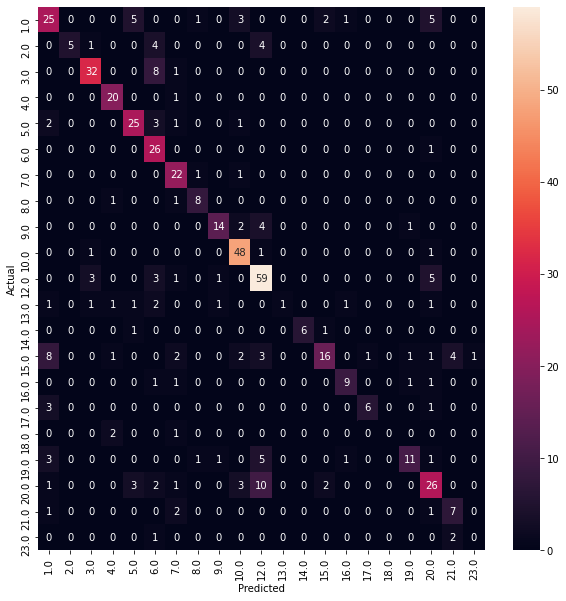


--------------- Fold: 10 ---------------------

              precision    recall  f1-score   support

         1.0       0.63      0.62      0.63        42
         2.0       0.62      0.36      0.45        14
         3.0       0.87      0.85      0.86        40
         4.0       0.86      0.90      0.88        21
         5.0       0.65      0.75      0.70        32
         6.0       0.72      0.96      0.83        27
         7.0       0.66      0.88      0.75        24
         8.0       0.57      0.80      0.67        10
         9.0       0.67      0.80      0.73        20
        10.0       0.77      0.92      0.84        51
        12.0       0.70      0.68      0.69        72
        13.0       0.50      0.30      0.37        10
        14.0       1.00      0.50      0.67         8
        15.0       0.72      0.53      0.61        40
        16.0       0.83      0.38      0.53        13
        17.0       1.00      0.30      0.46        10
        18.0       1.00      0.3

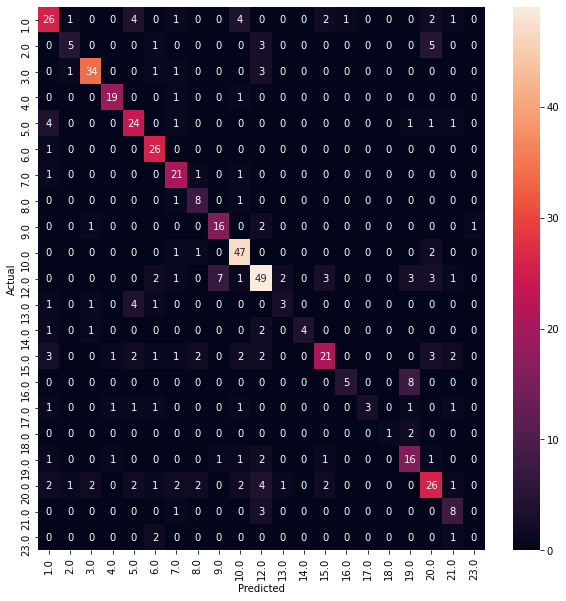


Overall results of the cross-validation procedure


CV accuracy: 0.689 +/- 0.022

CV precision: 0.694 +/- 0.027

CV recall: 0.690 +/- 0.021

CV f1: 0.674 +/- 0.025


In [62]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt

kfold = StratifiedKFold(n_splits=nfold).split(X, y)

accuracys = []
scores= []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X[train], y[train])
    y_pred=pipe_lr.predict(X[test])
    target_names=list(np.unique(y[train]))
    
    #calcolo accuracy
    accuracy = pipe_lr.score(X[test], y[test])
    accuracys.append(accuracy)
    #calcolo precision,recall,fscore
    score=precision_recall_fscore_support(y_true=y[test], y_pred=y_pred, labels=np.unique(y_pred), average="weighted")
    scores.append(score[0:3])
    print('--------------- Fold: %2d ---------------------'% (k+1))
    print()
    
    target_names = list(map(str,target_names))
    print(metrics.classification_report(y[test], y_pred, target_names=target_names))
    conf_mat = confusion_matrix(y[test], y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d',
                xticklabels=target_names , yticklabels=target_names )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print()
arr = np.array(scores)

print("Overall results of the cross-validation procedure")
print()

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracys), np.std(accuracys)))
print('\nCV precision: %.3f +/- %.3f' % (np.mean(arr[:,0]), np.std(arr[:,0])))
print('\nCV recall: %.3f +/- %.3f' % (np.mean(arr[:,1]), np.std(arr[:,1])))
print('\nCV f1: %.3f +/- %.3f' % (np.mean(arr[:,2]), np.std(arr[:,2])))